## Experimental Replication of the 3-SAT Phase Transition Phenomena

### 1. Import Dependencies

In [57]:
import random
import matplotlib.pyplot as plt

In [58]:
from DPLL import DPLLSolver
from SatGen import generate_3sat_instance

### 2. Defining the DPLL Run Script

This generates the 3-SAT problem instances and uses the DPLL Solver to solve them.

In [59]:
def dpll_run_script(num_vars, num_clauses, num_iterations):
    num_calls = []
    for i in range(num_iterations):
        solver = DPLLSolver()
        problem = generate_3sat_instance(num_vars,num_clauses)
        solver.solve(problem)
        num_calls.append(solver.dpll_count)
    return num_calls

### 3. Setting Constant/Variable Values

In [60]:
# Set the random seed for reproducibility
random.seed(42)

In [61]:
num_vars_list = [20,40,60]
ratio_list = [2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8]
num_iterations = 100
y_axis = []

### 4. Running the Script and Finding the Averages

In [62]:
for num_vars in num_vars_list:
    print(f"Running DPLL on {num_vars}-variable formulas")
    calls_list = []
    for i in ratio_list:
        num_clauses = num_vars*i
        num_clauses = int(num_clauses)
        num_calls = dpll_run_script(num_vars, num_clauses, num_iterations)
        average = sum(num_calls) / len(num_calls)
        calls_list.append(average)
    print(f"Average DPLL calls for each clause-to-variable ratio:\n {calls_list}")
    y_axis.append(calls_list)

Running DPLL on 20-variable formulas
Average DPLL calls for each clause-to-variable ratio:
 [12.14, 12.36, 11.9, 11.34, 13.2, 14.28, 14.12, 13.07, 11.38, 10.61, 10.81, 9.24, 8.76]
Running DPLL on 40-variable formulas
Average DPLL calls for each clause-to-variable ratio:
 [22.67, 22.31, 20.5, 22.57, 32.03, 46.5, 39.84, 34.0, 29.24, 23.66, 21.08, 18.22, 16.18]
Running DPLL on 60-variable formulas
Average DPLL calls for each clause-to-variable ratio:
 [33.35, 32.76, 30.27, 33.61, 87.32, 136.82, 104.45, 75.52, 64.8, 50.14, 41.9, 34.66, 30.46]


### 5. Plot the Graph

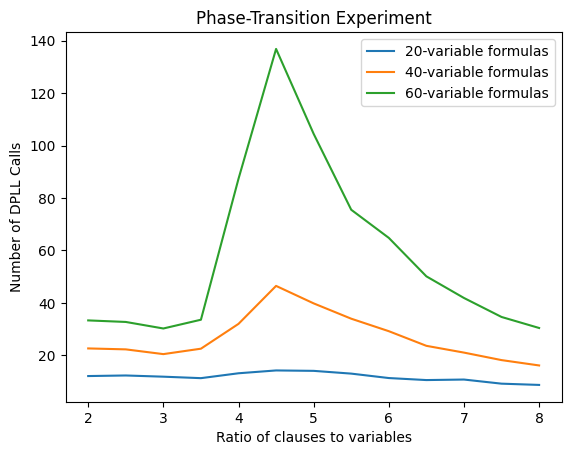

In [64]:
y20 = y_axis[0]
y40 = y_axis[1]
y60 = y_axis[2]
# y20 = [11.84, 12.26, 13.32, 13.47, 10.89, 10.05, 8.58]
# y40 = [22.39, 21.15, 34.64, 42.01, 29.57, 21.08, 18.4]
# y60 = [33.12, 31.05, 84.8, 102.41, 60.58, 41.52, 30.62]

# Plotting the three graphs
plt.plot(ratio_list, y20, label='20-variable formulas')
plt.plot(ratio_list, y40, label='40-variable formulas')
plt.plot(ratio_list, y60, label='60-variable formulas')

# Adding a title and labels
plt.title("Phase-Transition Experiment")
plt.xlabel("Ratio of clauses to variables")
plt.ylabel("Number of DPLL Calls")

# Adding a legend to differentiate the graphs
plt.legend()

# Display the plot
plt.show()